# Week9 - Ensemble Assignment

1. Train Model
* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings
* Save the best model

2. In a new notebook, load the saved model
* Evaluate your results data with `generate_dataset_prod()`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset(sample=1000, random_state=42):   
    X, y = make_circles(n_samples=sample,noise=0.1, random_state=random_state)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=sample, noise=0.1, random_state=random_state)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

# production data - use this in the new notebook with the saved model
def generate_dataset_prod(sample=300, random_state=60):   
    X, y = make_circles(n_samples=sample,noise=0.1, random_state=random_state)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=sample, noise=0.1, random_state=random_state)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [3]:
X, y = generate_dataset()

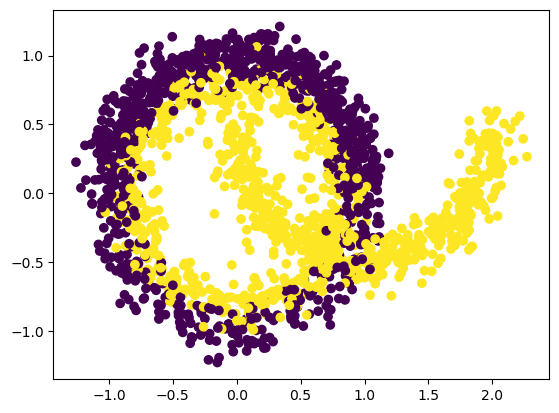

In [4]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [5]:
y.value_counts()

y
1    1000
0    1000
Name: count, dtype: int64

# Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 2), (400, 2), (1600,), (400,))

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

<b> I decided to not do feature scaling as Tree based models are independed to scale of features. And, I will be testing with different bagging and boosting models like RandomForest, AdaBoost and Gradient Boosting from Scikit-Learn.

# Random Forest Classifier

In [9]:
# base random forest classifier
random_forest = RandomForestClassifier(random_state=42)

# the hyperparameter space for random forest
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# randomized search for hyperparameter tuning
# will randomly select hyperparameters from the specified space and apply cross-validation - 
# It is much faster and better than grid search CV.
random_search_RF = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=25, cv=4, random_state=42, n_jobs=-1)

random_search_RF.fit(X_train, y_train)
print("The Best validation score is given as :", random_search_RF.best_score_)
y_pred = random_search_RF.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

The Best validation score is given as : 0.875
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       202
           1       0.82      0.84      0.83       198

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



Well, here, we optimize the hyperparameters of the Random Forest model using randomized search CV with cross-validation. The model achieved an accuracy of 83%. Given that there is no issue of class imbalance, the model performance in terms of accuracy and other metrics is  very similar. Lets also try other models and see which one performs the best.

# AdaBoost

In [10]:
# the adaboost model and its hyperparameter space
adaboost = AdaBoostClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# randomized search for hyperparameter tuning
# will randomly select hyperparameters from the specified space and apply cross-validation - 
# It is much faster and better than grid search CV.
random_search_AB = RandomizedSearchCV(estimator=adaboost, param_distributions=param_dist, n_iter=25, cv=4, random_state=42, n_jobs=-1)

random_search_AB.fit(X_train, y_train)
print("The Best validation score is given as :", random_search_AB.best_score_)
y_pred = random_search_AB.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\neupa\anaconda3\envs\geo_env\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 16 is smaller than n_iter=25. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The Best validation score is given as : 0.861875
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       202
           1       0.83      0.78      0.81       198

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



Now, we optimize the hyperparameters of the AdaBoost model using randomized search CV with cross-validation. The model achieved an accuracy of 81%. Given that there is no issue of class imbalance, the model performance in terms of accuracy and other metrics is  slightly lower than Random Forest. Lets also try other models and see which one performs the best.

# Gradient Boosting

In [11]:
# the gradient boosting model and its hyperparameter space
gradient_boosting = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 10]
}

# randomized search for hyperparameter tuning
# will randomly select hyperparameters from the specified space and apply cross-validation - 
# It is much faster and better than grid search CV.
random_search_GB = RandomizedSearchCV(
    estimator=gradient_boosting,
    param_distributions=param_dist,
    n_iter=10,
    cv=4,
    random_state=42,
    n_jobs=-1
)

random_search_GB.fit(X_train, y_train)
print("The Best validation score is given as :", random_search_GB.best_score_)
y_pred_gb = random_search_GB.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_gb))

The Best validation score is given as : 0.8656250000000001
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       202
           1       0.85      0.85      0.85       198

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Now, we optimize the hyperparameters of the GradientBoosting model using randomized search CV with cross-validation. The model achieved an accuracy of 85%. Given that there is no issue of class imbalance, the model performance in terms of accuracy and other metrics is  slightly better than Random Forest. Lets also try other models and see which one performs the best.

# Logistic Regression with Bagging

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# training logistic regression with bagging
logistic_regression = LogisticRegression(random_state=42)
bagging = BaggingClassifier(base_estimator=logistic_regression, n_estimators=50, random_state=42)

bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

print(classification_report(y_test, y_pred_bagging))

c:\Users\neupa\anaconda3\envs\geo_env\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.69      0.64      0.66       202
           1       0.66      0.71      0.68       198

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.67      0.67       400



Well, I also tried using Logistic Regression as a base learner for my bagging classifier. But, its clear that using a linear model as a weak learner is not a good idea as it cannot understand data well given the non-linearity. I would decide to use Random Forest as it is clearly a winner.

<b> It is clear that using multiple base learners as optimizng them either by boosting or using bootstrap aggregation (bagging) is a clever technique to optimize prediction accuracy. In my use case, I would use Gradient Boosting Classifier as it gives most accuracy and took very less time to train. I will now save the best model and use it in another jupyter notebook for inferences.

# Saving Best Model

In [13]:
import joblib

# using joblib to export the trainied Random forest model 
joblib.dump(random_search_GB.best_estimator_, 'optimized_GB_model.pkl')
print("Gradient Boosting Classifier model saved as 'optimized_GB_model.pkl'")

Gradient Boosting Classifier model saved as 'optimized_GB_model.pkl'
